## Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

sum_sales - суммарные продажиHere are the main educational projects that I completed while studying at Yandex.Practicum in the "Data Science" direction 

## Открою файлы и изучу общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from scipy import stats as st

pd.options.display.float_format = '{:,.2f}'.format #снижает размерность чисел для вывода на экран на всем проекте, форматирует строки

def unic(col):
    print(data[col].unique())
    return

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.columns = map(str.lower, data.columns)
print(data.isna().sum())
print('\nCтрок-дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
r

In [3]:
data.describe(include = "all")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,"16,446.00",16713,"16,715.00","16,715.00","16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,0.50,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,NaN,NaN
75%,NaN,NaN,"2,010.00",NaN,0.24,0.11,0.04,0.03,79.00,NaN,NaN


In [4]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

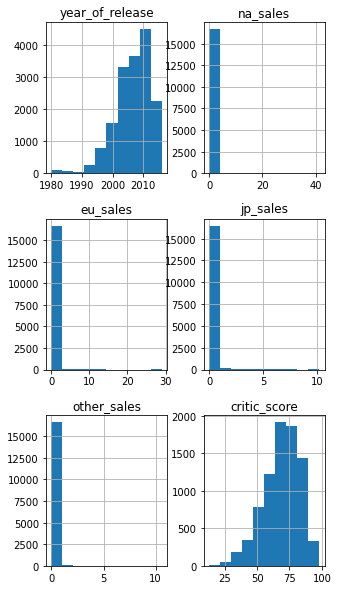

In [5]:
data.hist(figsize=(5, 10))
plt.show

В датасете 11 столбцов с 16715 строками. Названия столбцов нужно будет привести к нижнему регистру, поменять тип данных в столбце Year_of_Release и Critic_Score в целочисленный, поработать с явными и неявными дубликатами в столбцах Name, Platform, Genre.
Мы видим пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
Нужно будет разобраться с причиной пропусков и, если нужно и возможно, заполнить их.

Очевидно, что пропуски в столбце с указанием жанра игры в количестве 2 строк (или не внесено или данр не определен или ошибка при выгрузке данных) не будут показательными при анализе данных, эти строки я буду удалять. 
Еще 2 строки, где пропущено название игр(или не внесено или не утвердили или ошибка при выгрузке данных), можно удалить, но я оставлю, так как в целях анализа нам наиболее интересны данные из других столбцов, а в этом столбце заменю пропуски на значение 'unknown', если бы я удалила эти строки с пропусками на статистику это не повлияло бы ввиду слишком малого значения таких строк. 

Пропущенные значения в столбце с годами выпуска (1.7% датасета) могли возникнуть если игра еще не вышла, год не внесли или произошла ошибка при выгрузке данных. Я не смогу заполнить значения этого столбца на основании данных других столбцов(даже если дата есть в названии или есть оценка критиков, а в столбце с оценкой пользователей стоит tbd, это может занчить не только что игры еще не вышли, а то, что игры не оценены в принципе), их придется удалить.

Еще есть много пропусков в столбце с рейтингом игр. В Интернете написано, что рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а так же в Австралии. Возможно ,что игра не выпущена и рейтинг не присвоен, произошла ошибка при сборе данных или рейтинг на момент выхода игры не выставлялся. На всякий случай заменю пропуски в этом столбце на 'unknown', потом решу что с этим делать.

В столбце с оценкой пользователей есть оценка tbd (to be determined) - данных для оценки недостаточно, скорее всего, это означает, что игры еще не были выпущены для пользователей или пользователи по какой-то причине не оценили игры та как эту оценку пользователи указывали в различные годы. Чем-то это значение похоже на NaN, на это значения для дальнейшего анализа и замены данных я их и заменю.

Данные в столбцах critic_score и user_score для заявленных целей анализа будут иметь важное значение, если я даже заполню прпуски в этих данных на медианное по платформе, жанру и году, данные будут некорректны, поэтому пока заполню пропуски аномальным значением.

## Подготовлю данные для исследования

In [6]:
data = data.dropna(subset=['genre', 'year_of_release']).reset_index(drop=True)
data['name'] = data['name'].fillna('unknown')
data['rating'] = data['rating'].fillna('unknown')
print(data.query('user_score == "tbd"').pivot_table(index='year_of_release', values='name', aggfunc='count'))

                 name
year_of_release      
1,997.00            1
1,999.00            8
2,000.00           43
2,001.00           82
2,002.00          192
2,003.00           95
2,004.00          107
2,005.00          121
2,006.00          124
2,007.00          192
2,008.00          326
2,009.00          405
2,010.00          331
2,011.00          217
2,012.00           24
2,013.00           15
2,014.00           21
2,015.00           38
2,016.00           34


In [7]:
data['user_score'].replace('tbd', np.nan, inplace=True) #Если нужно специально присвоить значение NaN элементу структуры данных, для этого используется np.NaN (или np.nan) из библиотеки NumPy.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


In [9]:
columns_to_replace = ['critic_score','user_score']
for index in columns_to_replace:
    data[index] = data[index].fillna('-1').astype('float')

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(np.int32) #для экономии вычислительной памяти перешла в 
data['critic_score'] = data['critic_score'].astype(np.int32)

In [12]:
# Просчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [13]:
unic('name')
unic('platform')
unic('rating')
data['rating'] = data['rating'].replace('K-A', 'E') #тот рейтинг изначально был известен как Kids to Adults (K-A) до 1998 года; 
unic('rating')
unic('genre')

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
['E' 'unknown' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


## Проведу исследовательский анализ данных

**Посмотрю, сколько игр выпускалось в разные годы**

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64
<class 'pandas.core.series.Series'>


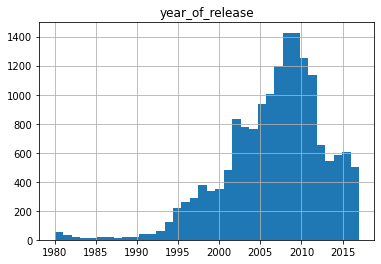

In [14]:
data.hist('year_of_release', bins=36, range = (1980, 2017))
print(data.groupby('year_of_release')['name'].count())
print(type(data['year_of_release']))


Видим, что в период с 2006 по 2011 год выпускалось больше игр, чем в другие периоды, максимальное количество игр выпустили в 2008 и 2009 гг.
С учетом того, что разработка игр развивается, важными для анализа будут данные не за все года.
Можно исключить выбросы с применением расчета интерквартильного размаха: выбросы определяются как наблюдения, которые падают ниже Q1 - 1,5*IQR или выше Q3 + 1,5 IQR.

In [15]:
def drop_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Интерквартильный размах, выбросы здесь определяются как наблюдения, которые падают ниже Q1 - 1,5*IQR или выше Q3 + 1,5 IQR.
    low_iqr  = q1-1.5*iqr
    high_iqr = q3+1.5*iqr
    df_out = df.loc[(df[col] > low_iqr) & (df[col] < high_iqr), col]
    return df_out

data_dump = ['year_of_release'] #оставила список чтоб если что еще чего-нить сюда добавить
for i in data_dump:
     data[i] = drop_iqr(data, i)  


**Посмотрю, как менялись продажи по платформам**

Выберу платформы с наибольшими суммарными продажами и построю распределение по годам.

In [16]:
top_10_platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(10)
top_10_platform = top_10_platform.reset_index()
print(top_10_platform)

  platform  sum_sales
0      PS2   1,233.56
1     X360     961.24
2      PS3     931.34
3      Wii     891.18
4       DS     802.78
5       PS     727.58
6      PS4     314.14
7      GBA     312.88
8      PSP     289.53
9      3DS     257.81


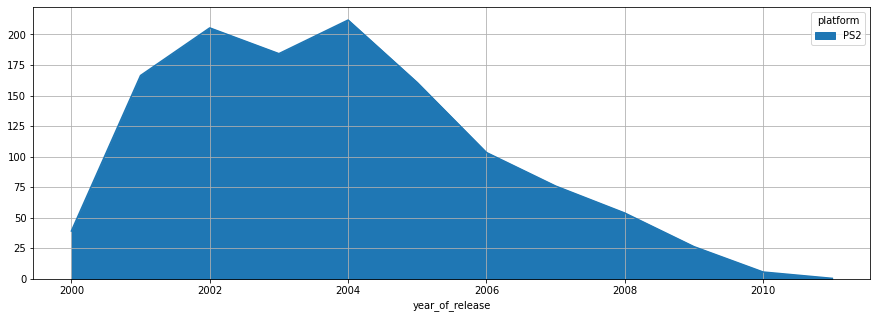

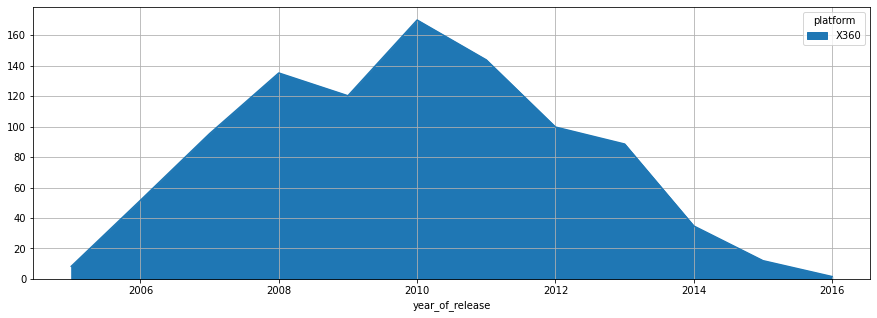

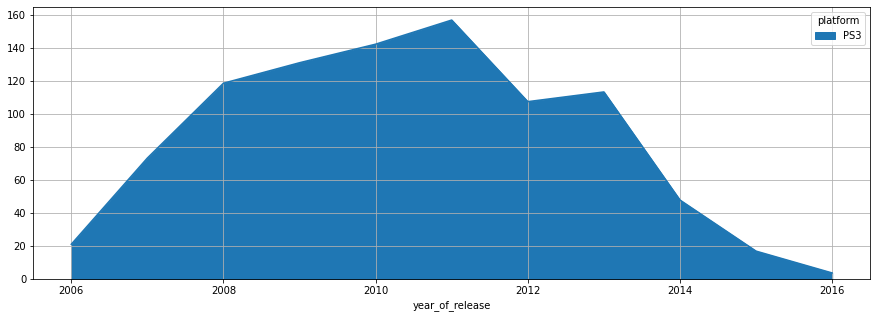

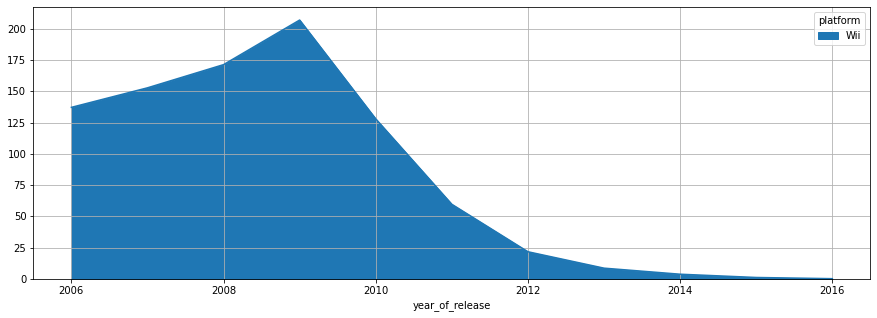

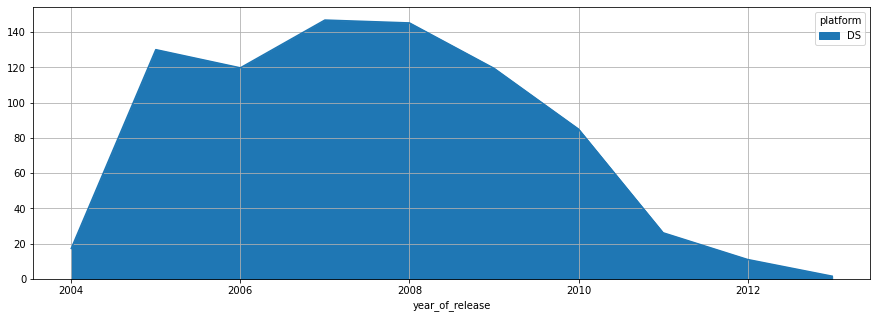

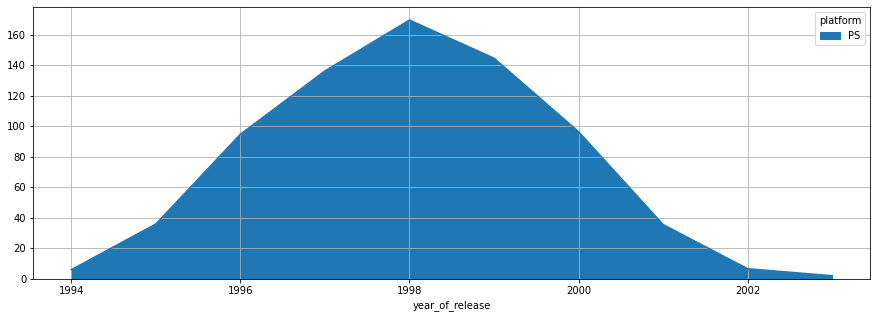

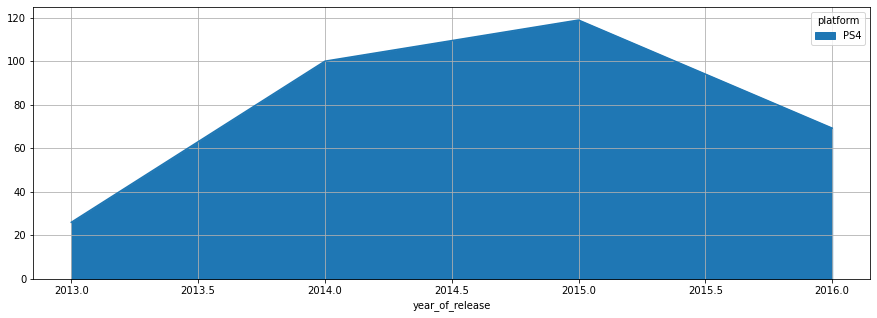

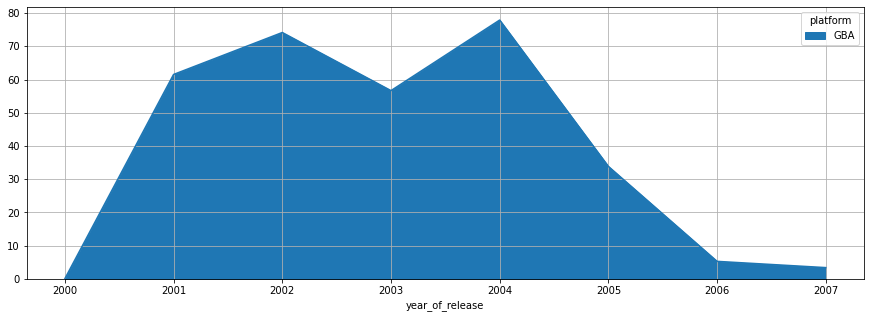

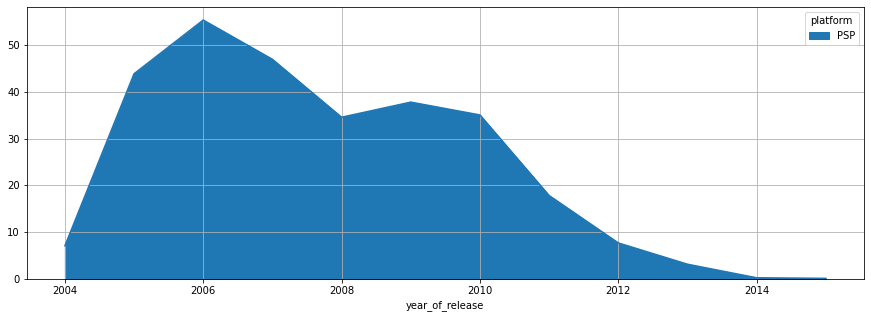

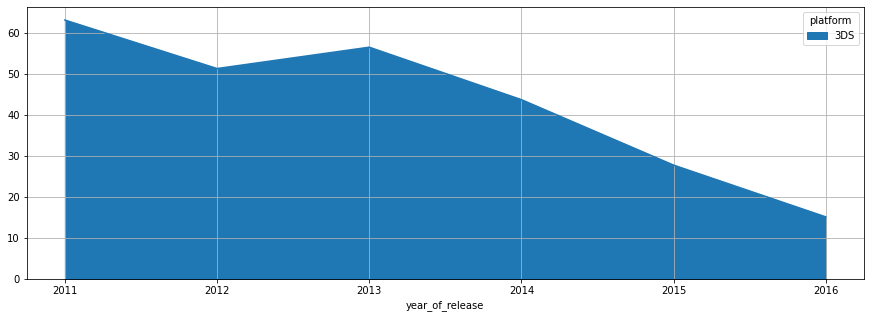

In [17]:

for i in top_10_platform['platform']:
    data[data['platform'] == i].pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(kind='area', grid=True, figsize=(15, 5))
    plt.show()

Cогласно графикам вижу, что чаще всего платформами пользуются около 10 лет, например, на платформах с наиболее популярными продажами PS2, X360 и PS3 это было именно так.

Максимум продаж на PS2 был в 2002 и 2004 годах, X360 - в 2008 и 2010, PS3 - в 2008, 2011, Wii - 2009 - в среднем это через 4 года после выпуска, затем идет спад продаж

В такой динамично развивающейся индустрии для прогнозирования не стоит брать слишком большой ввременной интервал, в этой связи возьму данные за 2 года.

Мне подойдет период с 2014 по 2016 гг: в 2014 многие платформы из выявленных мной топ-10 по продажам уже не пользовались популярностью, а некоторые уже появилис, а взять период с 2015 по 2016 гг будет нецелесообразно так как данные за 2016 год не полные. В дальнейшем для анализа выберу платформы: 'PS4','X360','PS3','3DS', 'Wii'

In [19]:
data_loc = data.query("2014 <= year_of_release <= 2016")
top5 = ['PS4','X360','PS3','3DS', 'Wii']
data_loc_top5 = data_loc[data_loc['platform'].isin(top5)]
data_loc_top5.describe()

data_dump = ['sum_sales'] 
for i in data_dump:
     data_loc_top5[i] = drop_iqr(data_loc_top5, i)  

/tmp/ipykernel_32/2516091405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_top5[i] = drop_iqr(data_loc_top5, i)


<Figure size 1080x432 with 0 Axes>

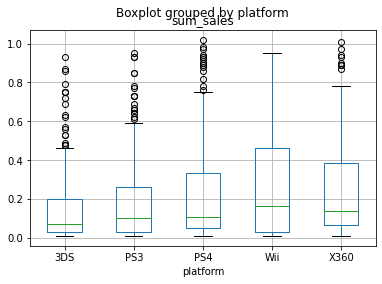

In [20]:
plt.figure(figsize=(15,6))
data_loc_top5.boxplot(column='sum_sales', by='platform')

plt.show()

Медианные продажи выше всего на платформе 'Wii' - там размещать игры выгоднее всего. Дешевле всего медианная продажа на 3DS. На каждой из платформ выпускают игры, которые собирают аномально высокие продажи, что, скорее всего, не зависит от платформы.

**Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Для анализа возьму платфрму PS3

In [21]:
ps3_loc = data_loc[data_loc['platform']=='PS3']
print('Влияние на продажи PS3 отзывов пользователей', ps3_loc['sum_sales'].corr(ps3_loc['user_score']))
print('\nВлияние на продажи PS3 отзывов критиков', ps3_loc['sum_sales'].corr(ps3_loc['critic_score']))

Влияние на продажи PS3 отзывов пользователей 0.2075281398673539

Влияние на продажи PS3 отзывов критиков 0.02361214290127286


Влияние на продажи внутри PS3 незначительно (корелляция 0,21) влияют оценки пользователей, оценки критиков на продажи не влияют.

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

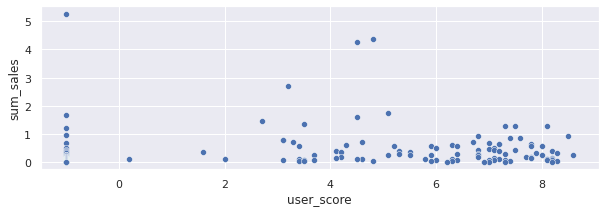

In [22]:
sns.set(rc={'figure.figsize':(10,3)})
sns.scatterplot(x=ps3_loc['user_score'], y=ps3_loc['sum_sales'])

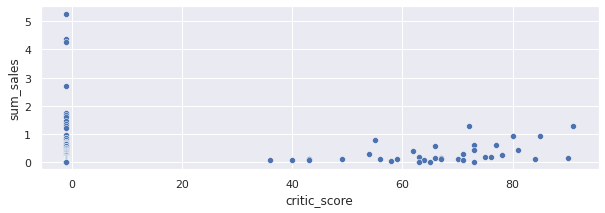

In [23]:
sns.set(rc={'figure.figsize':(10,3)})
sns.scatterplot(x=ps3_loc['critic_score'], y=ps3_loc['sum_sales'])
plt.show()

**Соотнесу выводы с продажами игр на других платформах.**

Платформа PS4

Влияние на продажи на платформе отзывов пользователей -0.040131589472697356
Влияние на продажи на платформе отзывов критиков 0.33982751788998095


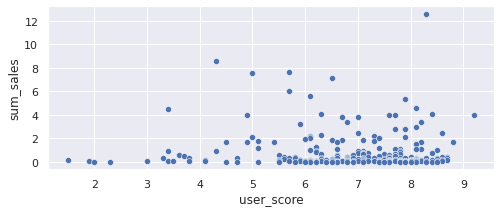

Платформа X360

Влияние на продажи на платформе отзывов пользователей -0.138444570945665
Влияние на продажи на платформе отзывов критиков -0.05093163935204705


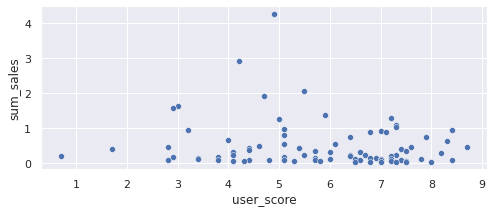

Платформа PS3

Влияние на продажи на платформе отзывов пользователей -0.16676141347662116
Влияние на продажи на платформе отзывов критиков -0.15787264544204535


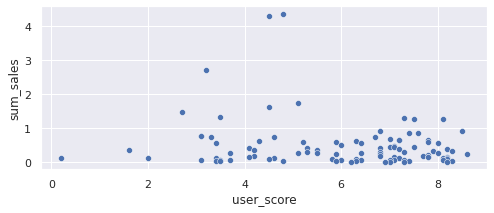

Платформа 3DS

Влияние на продажи на платформе отзывов пользователей 0.2151932718527028
Влияние на продажи на платформе отзывов критиков 0.1944027062913873


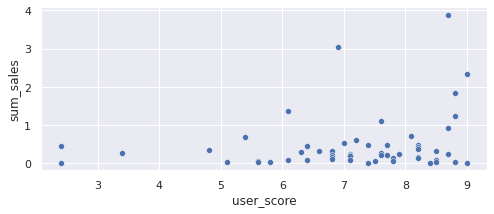

Платформа Wii

Влияние на продажи на платформе отзывов пользователей 1.0
Влияние на продажи на платформе отзывов критиков nan


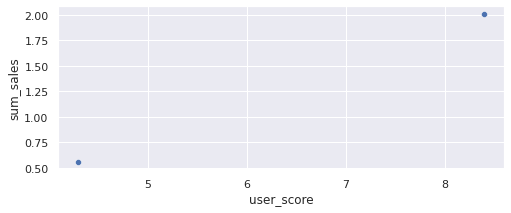

In [48]:
top = ['PS4','X360','PS3','3DS', 'Wii']
def top_5_corr(top):
    #platform_loc = data_loc[data_loc['platform']==top]
    platform_loc = data_loc.query('platform ==@top and user_score != -1')
    print('Платформа', top)
    print('\nВлияние на продажи на платформе отзывов пользователей', platform_loc['sum_sales'].corr(platform_loc['user_score']))
    print('Влияние на продажи на платформе отзывов критиков', platform_loc['sum_sales'].corr(platform_loc['critic_score']))
    sns.set(rc={'figure.figsize':(8,3)})
    sns.scatterplot(x=platform_loc['user_score'], y=platform_loc['sum_sales'])
    plt.show()
    
    return

for i in top:
    top_5_corr(i)

#set(platform_loc['platform'])

Платформа PS4 Наибольшее влияние на продажи по платформе имеют отзывы критиков (0,33), связь прямая и умеренная. Связь между продажами и отзывами пользователей незначительная, обратная (-0,04).

На продажи по Платформе X360 значительно не влияют ни отзывы критиков, ни пользователей. Мы наблюдаем отрицательную корреляцию между отзывами критиков и пользователей.Платформа вышла в 2015 году и, возможно, за рассматриваемый период не была доработана, что может объяснить отрицательную корреляцию в -0,13 с отзывами пользователей.

Платформа PS3 Наблюдаем обратную корреляцию между вниянием отзывов критиков и пользователей на продажи. Возможно, это вязано с тем, что вышла более новая платформа, которая была более выигрышной для критиков и пользователей.

На продажи на Платформе 3DS незначительно(корреляция прямая 0,21 и 0,19) влияют ни отзывы пользователей и критиков.

Платформа Wii Это – старая платформа и в рассматриваемый мной период она уже доживала свой век, данных по ней за рассматриваемый период очень мало, поэтому влияние на продажи на платформе отзывов пользователей прямое.

3.5. Посмотрю на общее распределение игр по жанрам.

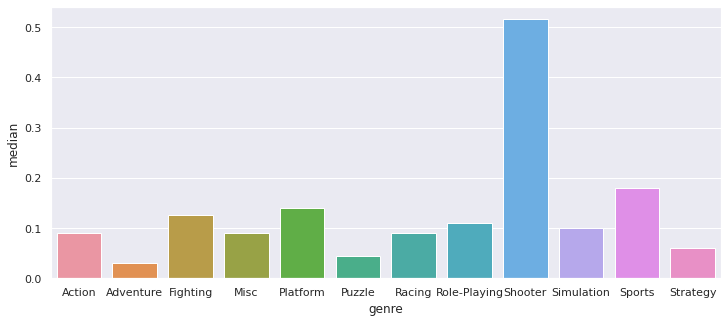

In [26]:
data_loc_genre = data_loc.pivot_table(index='genre', values='sum_sales', aggfunc='median').reset_index()
data_loc_genre.columns = ['genre','median']
plt.figure(figsize=(12, 5)) # Настройка размеров подложки
sns.barplot(data=data_loc_genre, x='genre', y='median')
plt.show()

Вижу, что самыми прибыльными жанрами по медианным продажам являются Shooter, Sports, Platform Fighting, Acton.
Высокие медианные продажи у игр жанра Shooter и Sports, низкие - у Adventure и Puzzle


## Составлю портрет пользователя каждого региона

**Портрет пользователя из Северной америки**

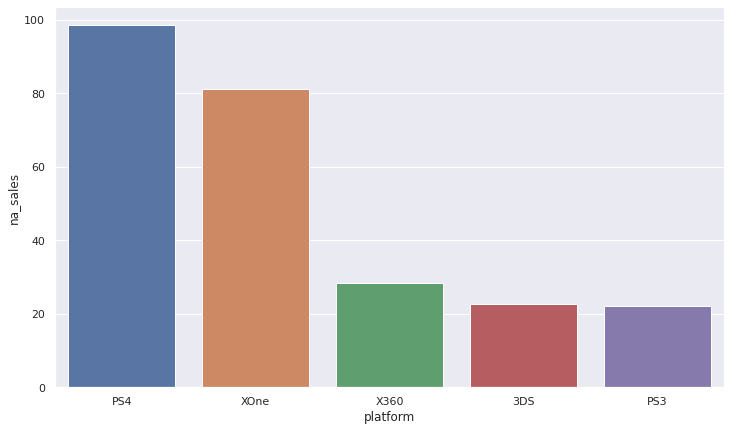

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05


In [28]:
platform_na = data_loc.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=platform_na, x='platform', y='na_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(platform_na)

Самые популярные платформы в Северной Америке PS4, XOne,X360,3DS,PS3

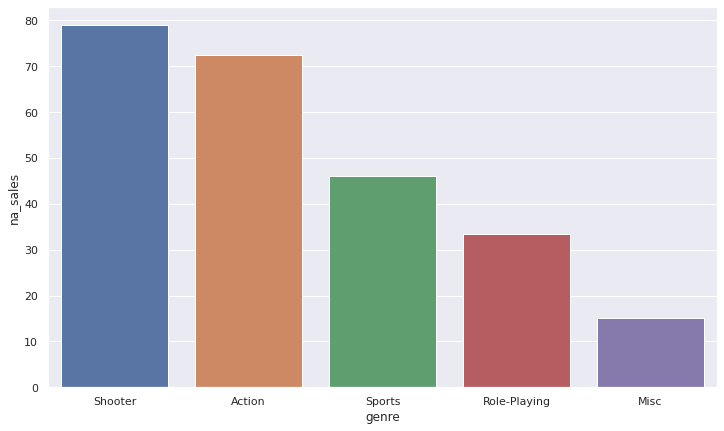

          genre  na_sales
0       Shooter     79.02
1        Action     72.53
2        Sports     46.13
3  Role-Playing     33.47
4          Misc     15.05


In [29]:
genre_na = data_loc.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=genre_na, x='genre', y='na_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(genre_na)

Самые популярные жанры - это Shooter, Action, Sports, Role-Playing,Misc

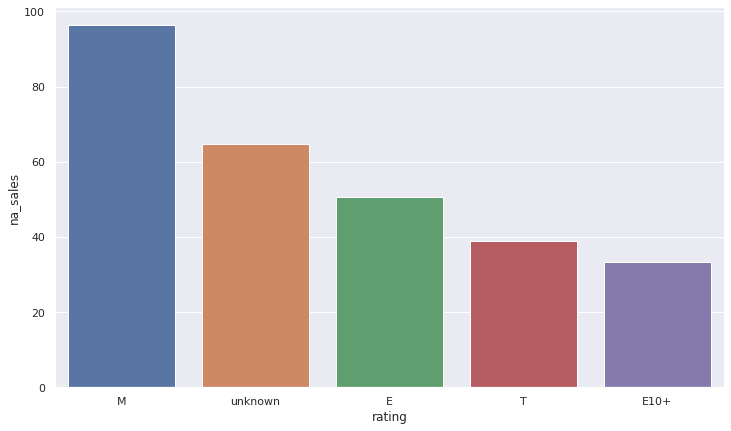

    rating  na_sales
0        M     96.42
1  unknown     64.72
2        E     50.74
3        T     38.95
4     E10+     33.23

Влияние рейтинга на продажи в Северной Америке 0.25095268339677146


In [30]:
#data_loc.pivot_table(index='rating', values='na_sales', aggfunc=['sum', 'count']).reset_index()

rating_na = data_loc.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=rating_na, x='rating', y='na_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(rating_na)

rating_na = data_loc.pivot_table(index='rating', values='na_sales', aggfunc=['sum', 'count']).reset_index()
rating_na.columns = ['rating','sum', 'count']
print('\nВлияние рейтинга на продажи в Северной Америке', rating_na['sum'].corr(rating_na['count']))

Пользователи из Северной Америки выбирают платформы  PS4, XOne,X360,3DS,PS3 (топ-5 платформ, наименование указано в порядке убывания популярности), топ-5 жанров игр, в которые они играют - это Shooter, Action, Sports, Role-Playing,Misc наимболее популярными являются игры с рейтингом М, Е,Т, Е10+. Играют и в игры, где рейтинг не указан

**Портрет пользователя из Европы**

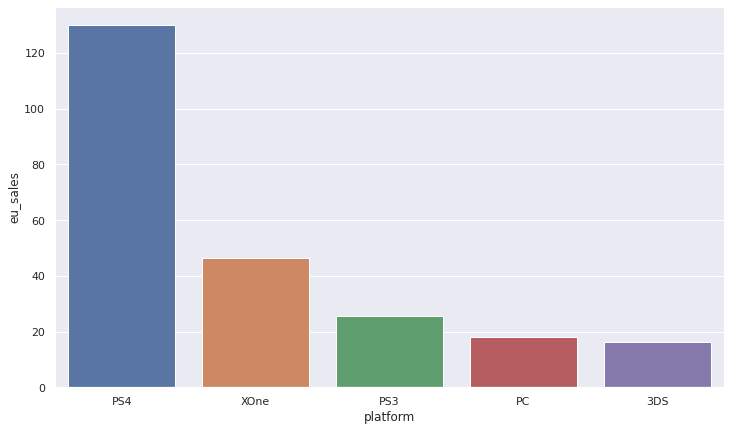

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12


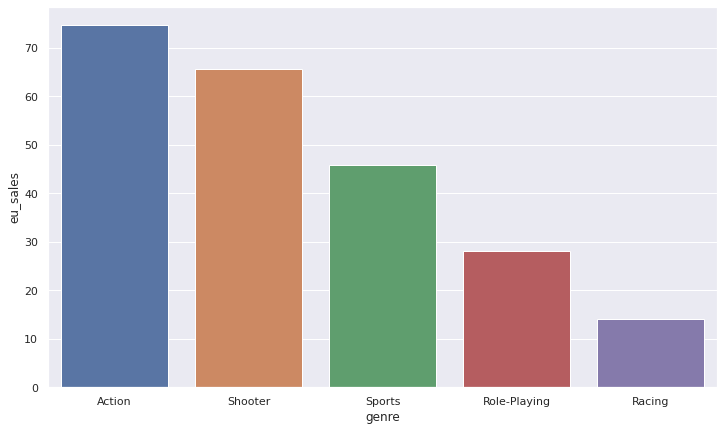

          genre  eu_sales
0        Action     74.68
1       Shooter     65.52
2        Sports     45.73
3  Role-Playing     28.17
4        Racing     14.13


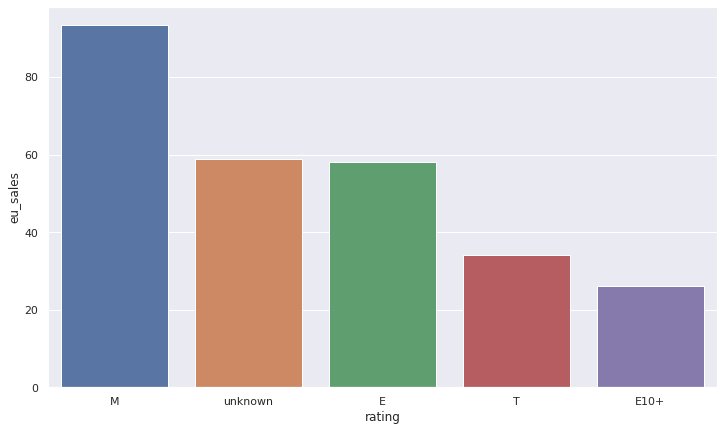

    rating  eu_sales
0        M     93.44
1  unknown     58.95
2        E     58.06
3        T     34.07
4     E10+     26.16

Влияние рейтинга на продажи в Северной Америке 0.17436737247965098


In [31]:
platform_eu = data_loc.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=platform_eu, x='platform', y='eu_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(platform_eu)

genre_eu = data_loc.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=genre_eu, x='genre', y='eu_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(genre_eu)

rating_eu = data_loc.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=rating_eu, x='rating', y='eu_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(rating_eu)

rating_eu = data_loc.pivot_table(index='rating', values='eu_sales', aggfunc=['sum', 'count']).reset_index()
rating_eu.columns = ['rating','sum', 'count']
print('\nВлияние рейтинга на продажи в Северной Америке', rating_eu['sum'].corr(rating_eu['count']))

Европейские геймеры чаще играют в игры на платформах   PS4, XOne,PS3, X360,3DS. Самые популярные жанры - это Action, Sports, Shooter, Misc, Racing с рейтингами M,E,T, E10+. Играют и в игры, где рейтинг не указан, возможно, это - старые игры, еще не вышедшие игры или в стране своя система рейтинга игр и данную рейтинговую систему в стране не применяют. Влияние рейтинга на продажи сильное, прямое.

Европа во-многом похожа на Северную Америку.

**Портрет пользователя из Японии**

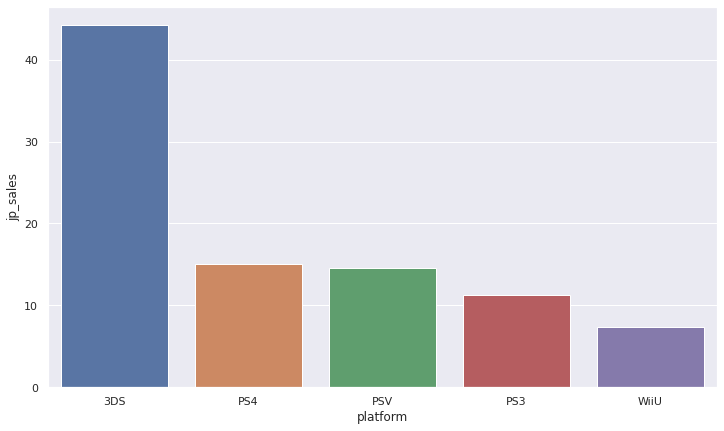

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31


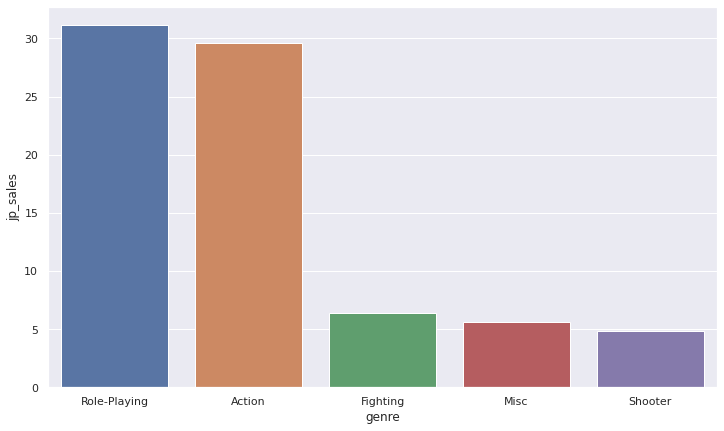

          genre  jp_sales
0  Role-Playing     31.16
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87


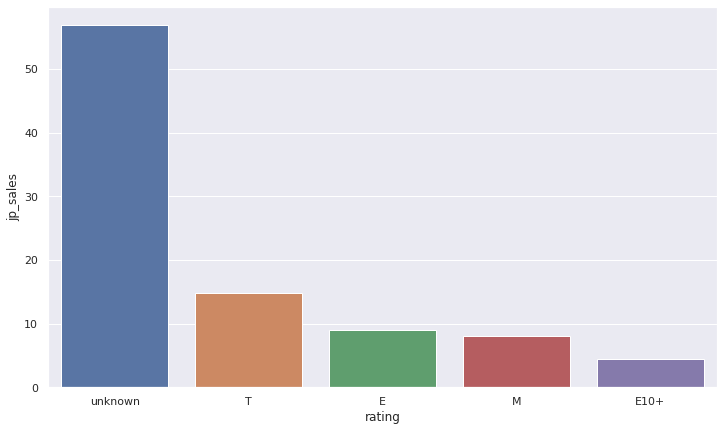

    rating  jp_sales
0  unknown     56.90
1        T     14.78
2        E      8.94
3        M      8.01
4     E10+      4.46

Влияние рейтинга на продажи в Японии 0.9940886426624111


In [32]:
platform_jp = data_loc.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=platform_jp, x='platform', y='jp_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(platform_jp)

genre_jp = data_loc.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(data=genre_jp, x='genre', y='jp_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(genre_jp)

rating_jp = data_loc.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=rating_jp, x='rating', y='jp_sales')
plt.show()
#plt.xlabel('') plt.ylabel('')
print(rating_jp)

rating_jp = data_loc.pivot_table(index='rating', values='jp_sales', aggfunc=['sum', 'count']).reset_index()
rating_jp.columns = ['rating','sum', 'count']
print('\nВлияние рейтинга на продажи в Японии', rating_jp['sum'].corr(rating_jp['count']))

Пользователи из Японии и выбирают платформы 3DS, PS3, PSP,PSVб Wii  (топ-5 платформ, наименование указано в порядке убывания популярности), топ-5 жанров игр, в которые они играют - это Role-Playing,Action,Fighting,Misc, Sports.

наимболее популярными являются игры с неуказанным рейтингом Т,Е, М,  Е10+. Вместе с тем, большая доля популярности по рейтингу в Японии - среди игр, где рейтинг не указан - возможно, это - старые игры, еще не вышедшие игры или в стране своя система ректинга игр и данную рейтинговую систему в стране не применяют.

Влияние рейтинга на продажи в Японии 0.99 - прямая сильная связь.

## Проверка гипотез


Для проверки гипотез буду использовать t-тест, так как выборки не зависят друг от друга, так как я не уверена, что обе выборки равны между собой.

**Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Нулевая гипотеза Н0: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза Н1: 
Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [33]:
#исключаем пропущенные и замененные на -1 значения, выбираем нужные платформы
xbox = data_loc.query('platform =="XOne" and user_score != -1')['user_score']
pc = data_loc.query('platform =="PC" and user_score != -1')['user_score']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
xbox,
pc, equal_var = False)

print('p-значение:', results.pvalue) # вывод на экран получившегося p-значения)

if results.pvalue < alpha: #сравните получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Действительно, средние пользовательские рейтинги платформ не одинаковы, поскольку имеют различный рейтинг у пользователей и различную популярность в разных регионах, а РС п орезультатам ранее проведенного анализа - более распространенная и, вероятно, более доработанная, платформа.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы и верно определен метод проверки. С выводом согласен. Вышло здорово. 
</div 

**Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"** 

H0: средние рейтинги по жанрам одинаковые

H1: средние рейтинги по жанрам разные

In [34]:
#исключаем пропущенные и замененные на -1 значения, выбираем нужные платформы
action = data_loc.query('genre =="Action" and user_score != -1')['user_score']
sports = data_loc.query('genre =="Sports" and user_score != -1')['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
action,
sports, equal_var = False)

print('p-значение:', results.pvalue) # вывод на экран получившегося p-значения)

if results.pvalue < alpha: #сравните получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, поскольку игры в жанре Экшен появились значитаельно ранее игр в жанре спортс и, скорее всего, более проработанны и более комфортны пользователям.

## Вывод по проекту

По результатам анализа можно сделать ставку на потенциально популярный продукт.
Успешные игры на каждом из рынков имеют свои особенности.

Пользователи из Северной Америки выбирают платформы PS4, XOne,X360,3DS,PS3 (топ-5 платформ, наименование указано в порядке убывания популярности), топ-5 жанров игр, в которые они играют - это Shooter, Action, Sports, Role-Playing,Misc наимболее популярными являются игры с рейтингом М, Е,Т, Е10+. Играют и в игры, где рейтинг не указан

Европейские геймеры чаще играют в игры на платформах PS4, XOne,PS3, X360,3DS. Самые популярные жанры - это Action, Sports, Shooter, Misc, Racing с рейтингами M,E,T, E10+. Играют и в игры, где рейтинг не указан, возможно, это - старые игры, еще не вышедшие игры или в стране своя система рейтинга игр и данную рейтинговую систему в стране не применяют. Влияние рейтинга на продажи сильное, прямое.

Пользователи из Японии и выбирают платформы 3DS, PS3, PSP,PSVб Wii (топ-5 платформ, наименование указано в порядке убывания популярности), топ-5 жанров игр, в которые они играют - это Role-Playing,Action,Fighting,Misc, Sports.
Наиболее популярными являются игры с неуказанным рейтингом Т,Е, М, Е10+. Вместе с тем, большая доля популярности по рейтингу в Японии - среди игр, где рейтинг не указан - возможно, это - старые игры, еще не вышедшие игры или в стране своя система ректинга игр и данную рейтинговую систему в стране не применяют.
Влияние рейтинга на продажи в Японии 0.99 - прямая сильная связь.

На продажи оценки пользователей влияют слабо, вместе с тем сильнее на продажи влияют оценки критиков.